# Quadrupole Example

Simple quadrupole example


In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# locate the drift template
from impact import Impact, template_dir

ifile = os.path.join(template_dir, 'quadrupole/ImpactT.in')
os.path.exists(ifile)

True

In [3]:
# calculate gamma*beta
mec2 = 0.51099895000e6 # eV
Etot = 6e6 #eV
gamma = Etot/mec2
GB = np.sqrt(gamma**2 -1)
GB


11.699046356605859

# Use Impact's built-in Gaussian particle generator

In [4]:
I = Impact(ifile)
I.header['Np'] = 100000
I.header['Nx'] = 32
I.header['Ny'] = 32
I.header['Nz'] = 32
I.header['Dt'] = 10e-12
I.header['Bcurr'] = 0

I.header['zmu2'] = GB

# set normal and skew quads
I.ele['CQ01']['b1_gradient'] = 0.00714 # T/m
I.ele['SQ01']['b1_gradient'] = 0



# Single particle tracking

In [5]:
# Track
I2 = I.copy()
I2.configure()

In [6]:
ele = I2.ele['CQ01']
ele

{'description': 'name:CQ01',
 'original': '0.36 0 0 1 0.01601  0.00714 0.210 0.0254 0.0 0.0 0.0 0.0 0 /!name:CQ01',
 'L': 0.36,
 'type': 'quadrupole',
 'zedge': 0.01601,
 'b1_gradient': 0.00714,
 'L_effective': 0.21,
 'radius': 0.0254,
 'x_offset': 0.0,
 'y_offset': 0.0,
 'x_rotation': 0.0,
 'y_rotation': 0.0,
 'z_rotation': 0.0,
 's': 0.37601,
 'name': 'CQ01'}

In [7]:
# Estimate for angle change for a 6 MeV/c momentum particle, offset by 1 mm.  
ele['b1_gradient']*ele['L_effective']*299792458 / 6e6 * .001

7.491813525419999e-05

In [8]:
P2 = I2.track1(s=2.2, z0 = 0, x0=0.001, pz0=6e6)
P2.xp

array([7.51244699e-05])

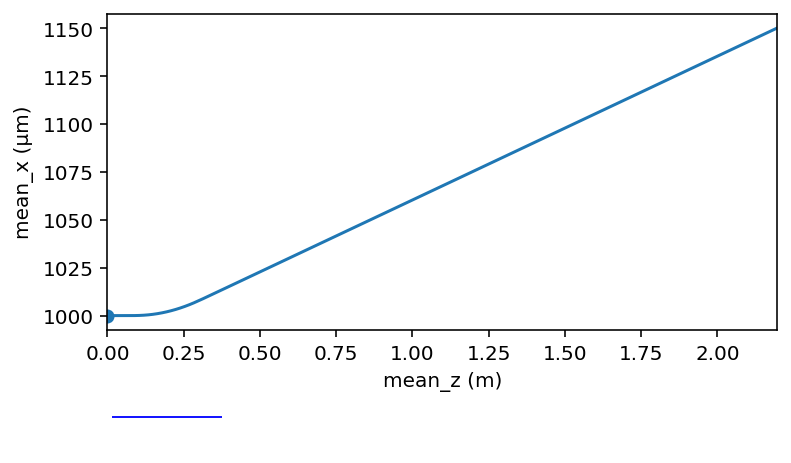

In [9]:
I2.plot('mean_x')

# Track beam

In [10]:
# Regular and Skew quads
I.run()

In [11]:
I.output['stats'].keys()

dict_keys(['t', 'mean_z', 'moment4_x', 'moment4_y', 'moment4_z', 'mean_y', 'sigma_y', 'norm_emit_y', 'mean_x', 'sigma_x', 'norm_emit_x', 'sigma_z', 'norm_emit_z', 'loadbalance_min_n_particle', 'loadbalance_max_n_particle', 'n_particle', 'moment3_x', 'moment3_y', 'moment3_z', 'mean_gamma', 'mean_beta', 'max_r', 'sigma_gamma', 'max_amplitude_x', 'max_amplitude_y', 'max_amplitude_z', 'moment4_px', 'moment4_py', 'moment4_pz', 'mean_py', 'sigma_py', 'cov_y__py', 'mean_px', 'sigma_px', 'cov_x__px', 'mean_pz', 'sigma_pz', 'cov_z__pz', 'moment3_px', 'moment3_py', 'moment3_pz', 'mean_kinetic_energy', 'max_amplitude_px', 'max_amplitude_py', 'max_amplitude_pz'])

In [12]:
PI = I.particles['initial_particles']
PF = I.particles['final_particles']
PI['sigma_y']

0.001000777236945671

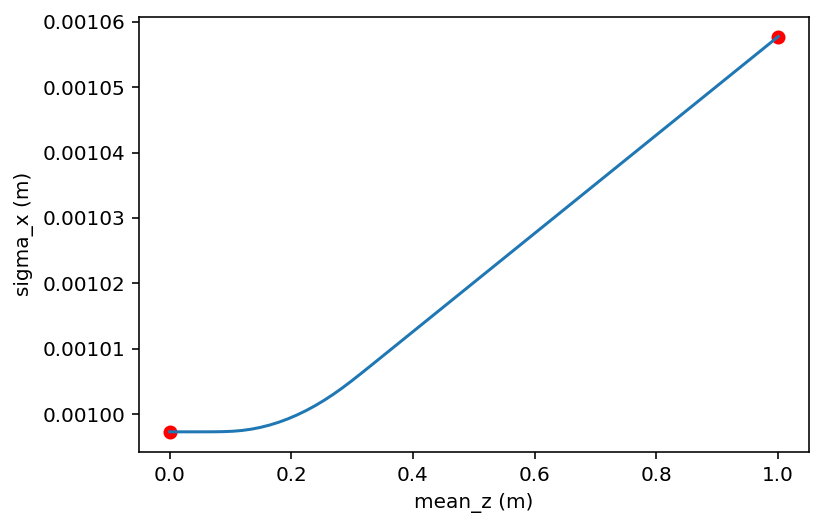

In [13]:
# Compare these. 
key1 = 'mean_z'
key2 = 'sigma_x'
units1 = str(I.units(key1))
units2 = str(I.units(key2))
plt.xlabel(key1+f' ({units1})')
plt.ylabel(key2+f' ({units2})')
plt.plot(I.stat(key1), I.stat(key2))
plt.scatter(
    [I.particles[name][key1] for name in I.particles], 
    [I.particles[name][key2] for name in I.particles], color='red')


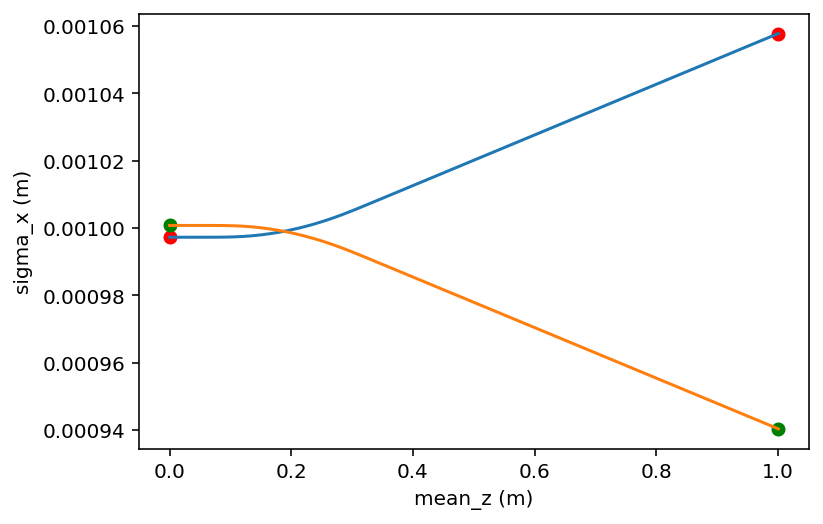

In [14]:
# Compare these. 
key1 = 'mean_z'
key2 = 'sigma_x'
units1 = str(I.units(key1))
units2 = str(I.units(key2))
plt.xlabel(key1+f' ({units1})')
plt.ylabel(key2+f' ({units2})')
plt.plot(I.stat(key1), I.stat(key2))
plt.scatter(
    [I.particles[name][key1] for name in I.particles], 
    [I.particles[name][key2] for name in I.particles], color='red')
key2 = 'sigma_y'
plt.plot(I.stat(key1), I.stat(key2))
plt.scatter(
    [I.particles[name][key1] for name in I.particles], 
    [I.particles[name][key2] for name in I.particles], color='green')

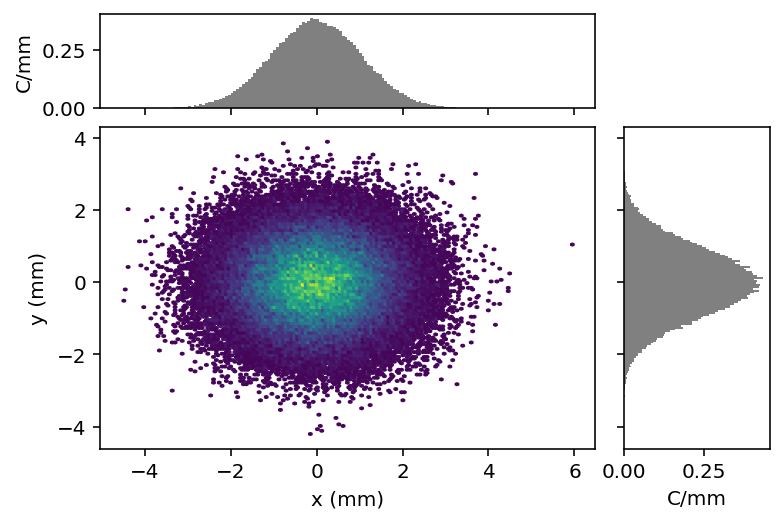

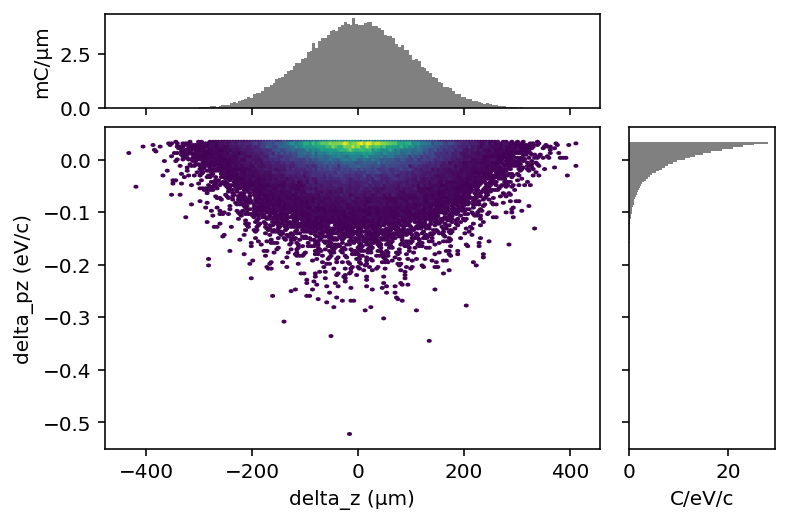

In [15]:
PF.plot('x', 'y')
PF.plot('delta_z', 'delta_pz')